| Name | Surname | ID Number |
|------|---------|---------------------|
| Lorenzo | Calandra Buonaura | 2107761 |

In [1]:
library("dplyr", warn.conflicts = FALSE)
library("ggplot2")
library("geosphere")

# Exercise 1 - Discrete random variable

The probability distribution function of a discrete variable $k$ following a zero-truncated Poisson distribution is given by:

$ P(k) = \frac{\lambda^k e^{-\lambda}}{k! (1 - e^{-\lambda})} $ where $ k = 1, 2, 3, \ldots $ and $ \lambda $ is the rate parameter of the Poisson distribution (assume $\lambda$ = 1.4).

### a) Write the R functions for the probability density and cumulative distribution functions, using the R naming convention.

In [2]:
trunc_poiss_pdf <- function(k, lambda) {
  num <- lambda ^ k * exp(-lambda)
  den <- factorial(k) * (1 - exp(-lambda))

  return(num / den)
}

trunc_poiss_cdf <- function(n, lambda) {
  cumulative_probability <- 0
  probabilities <- rep(0, n)

  for (k in 1:n) {
    probabilities[k] <- cumulative_probability
    cumulative_probability <- cumulative_probability +
      trunc_poiss_pdf(k, lambda)
  }

  return(probabilities)
}

### b) Produce two plots showing the pdf and cdf, separately.

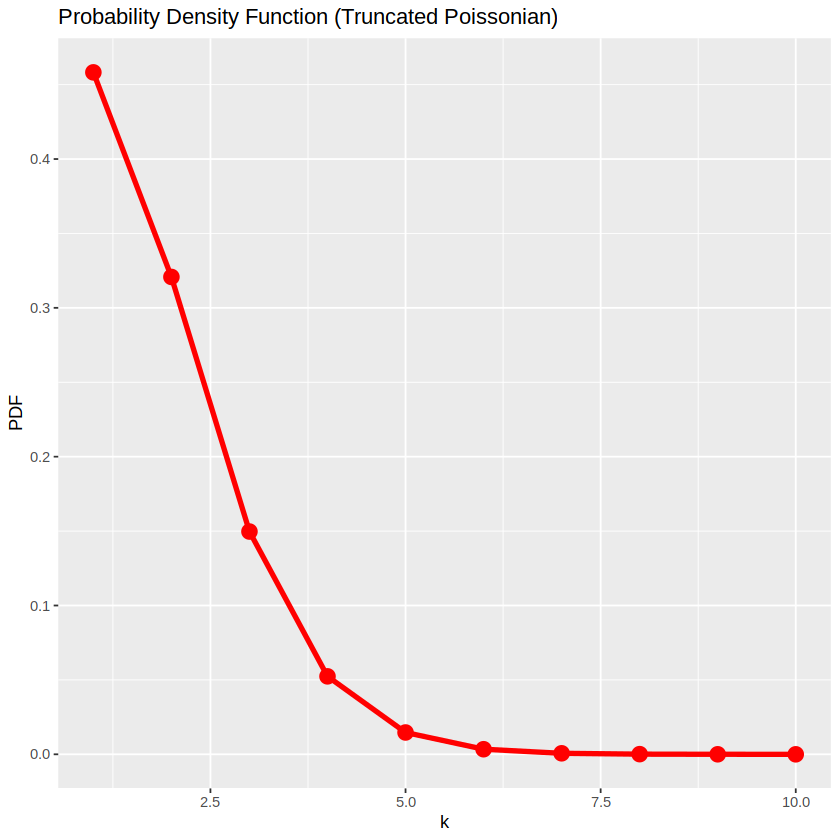

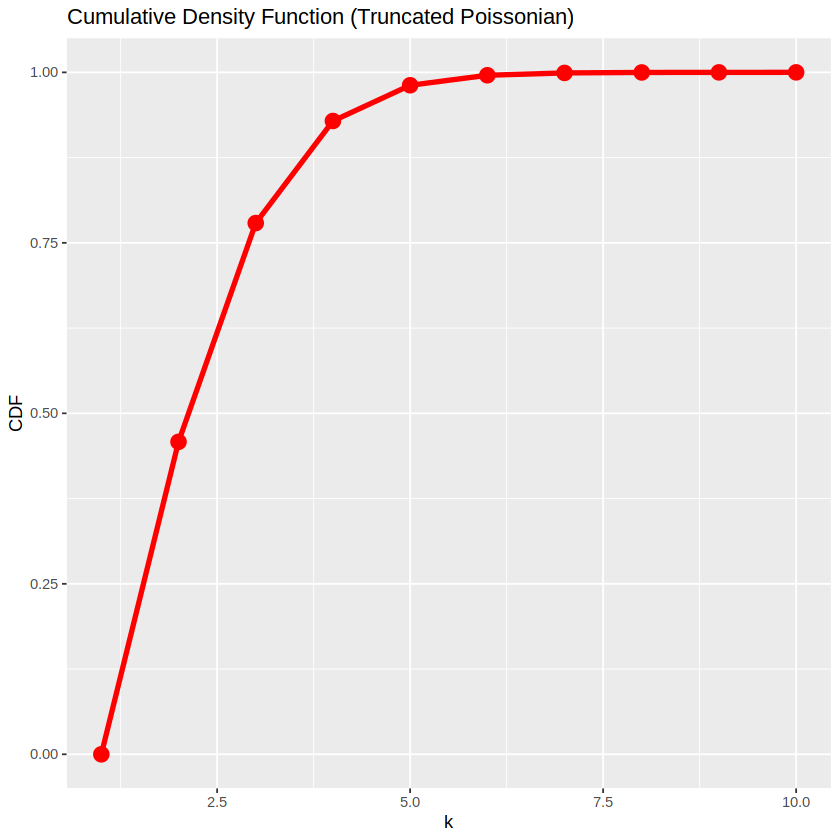

In [3]:
lambda <- 1.4
k_values <- 1:10

pdf_values <- data.frame(k = k_values,
                         PDF = trunc_poiss_pdf(k_values, lambda))
cdf_values <- data.frame(k = k_values,
                         CDF = trunc_poiss_cdf(tail(k_values, 1), lambda))

ggplot(pdf_values, aes(x = k, y = PDF)) +
  geom_point(color = "red", size = 4) +
  geom_line(color = "red", linewidth = 1.5) +
  labs(title = "Probability Density Function (Truncated Poissonian)",
       x = "k",
       y = "PDF")

ggplot(cdf_values, aes(x = k, y = CDF)) +
  geom_point(color = "red", size = 4) +
  geom_line(color = "red", linewidth = 1.5) +
  labs(title = "Cumulative Density Function (Truncated Poissonian)",
       x = "k",
       y = "CDF")

### c) Compute the mean value and variance of the probability distribution using R.

In [4]:
mean_over_k <- sum(k_values * trunc_poiss_pdf(k_values, lambda))
variance_over_k <- sum((k_values ^ 2) * trunc_poiss_pdf(k_values, lambda)) -
  (mean_over_k ^ 2)

sprintf("Mean: %s", mean_over_k)
sprintf("Variance: %s", variance_over_k)

[1] "Mean: 1.85823096683069"

[1] "Variance: 1.00669546800201"

### d) Generate a sample of random numbers from this distribution and show them in an histogram. Evaluate the sample mean.

[1] "Mean of the random sample: 1.8585"

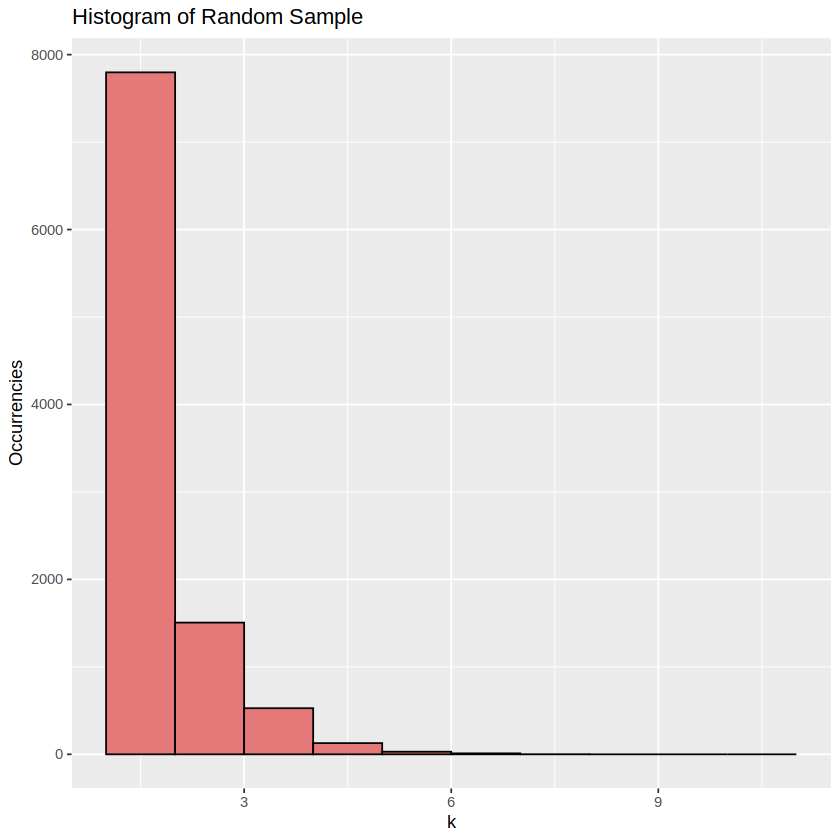

In [6]:
sample <- data.frame(k = sample(k_values, size = 10000, replace = TRUE,
                                prob = pdf_values$PDF))

ggplot(sample, aes(x = k)) +
  geom_histogram(breaks = seq(min(k_values), max(k_values) + 1, by = 1),
                 fill = "#e57878", color = "black") +
  labs(title = "Histogram of Random Sample",
       x = "k",
       y = "Occurrencies")

sprintf("Mean of the random sample: %s", mean(sample$k))

# Exercise 2 - Continuous random variable

The energy distribution of CR muons at sea level can be approximated as follows:

$ p(E) = 
\begin{cases} 
1 & \text{for } E < E_0 \\
(E - E_0 + 1)^{-\gamma} & \text{for } E \geq E_0
\end{cases} \qquad \qquad$ where $ E_0 = 7.25 $ GeV and $ \gamma = 2.7 $.


### a) Compute the normalisation factor N using R.

In [7]:
pdf_muons <- function(E, E0 = 7.25, gamma = 2.7) { # nolint
  ifelse(E < E0, 1, (E - E0 + 1) ^ (- gamma))
}

integral <- integrate(pdf_muons, lower = 0, upper = Inf)
N <- 1 / integral$value # nolint

sprintf("The normalization factor is: %s", N)

[1] "The normalization factor is: 0.127579703198913"

### b) Plot the probability density function in R.

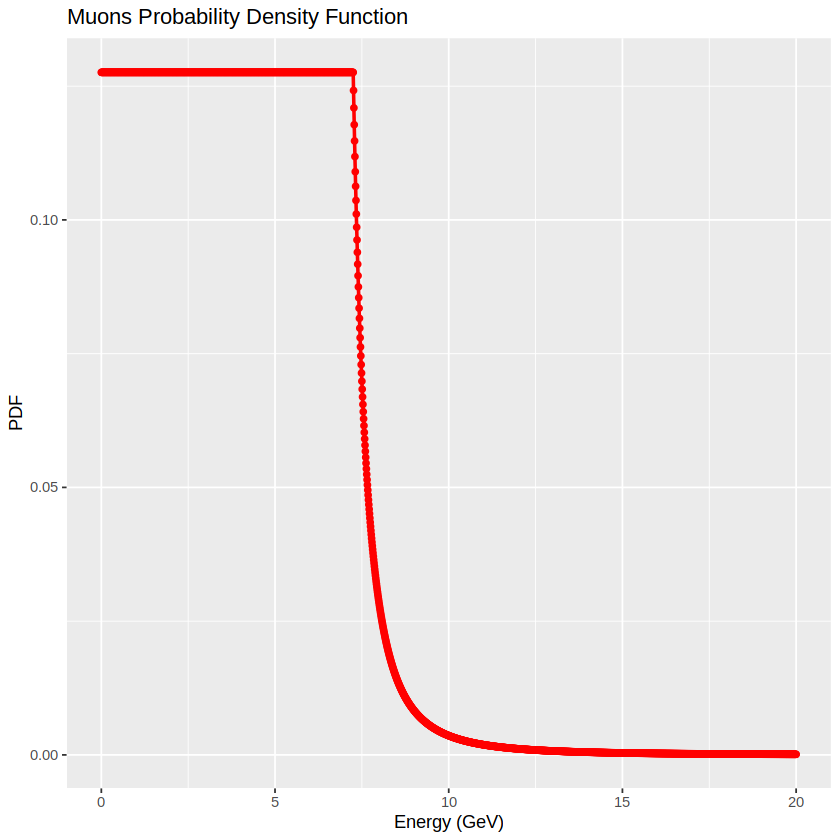

In [16]:
pdf_muons <- function(E, E0 = 7.25, gamma = 2.7) { # nolint
  integral <- integrate(function(x) ifelse(x < E0, 1, (x - E0 + 1) ^ (-gamma)),
                        lower = 0, upper = Inf)

  N <- 1 / integral$value # nolint

  ifelse(E < E0, N, N * (E - E0 + 1) ^ (- gamma))
}

energy_values <- seq(0, 20, by = 0.01)
pdf_values_muons <- data.frame(E = energy_values,
                               PDF = pdf_muons(energy_values))

ggplot(data = pdf_values_muons, aes(x = E, y = PDF)) +
  geom_point(color = "red", size = 1.5) +
  geom_line(color = "red", linewidth = 1) +
  labs(title = "Muons Probability Density Function",
       x = "Energy (GeV)",
       y = "PDF")

### c) Plot the cumulative density function in R.

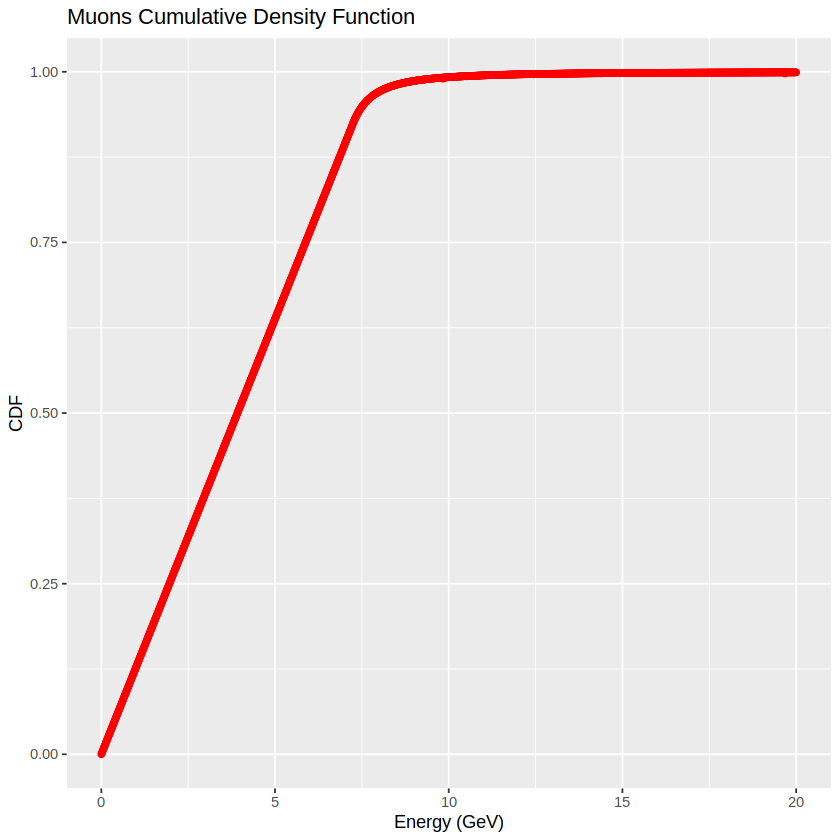

In [17]:
cdf_muons <- function(E_values, cont_func, E0 = 7.25, gamma = 2.7) { # nolint
  cumulative_prob <- rep(0, length(E_values))
  for (i in seq_along(E_values)) {
    cumulative_prob[i] <- integrate(cont_func, lower = 0,
                                    upper = E_values[i])$value
  }
  return(cumulative_prob)
}

cdf_values_muons <- data.frame(E = energy_values,
                               CDF = cdf_muons(energy_values, pdf_muons))

ggplot(data = cdf_values_muons, aes(x = E, y = CDF)) +
  geom_point(color = "red", size = 1.5) +
  geom_line(color = "red", linewidth = 1) +
  labs(title = "Muons Cumulative Density Function",
       x = "Energy (GeV)",
       y = "CDF")

### d) Compute the mean value using R.

In [18]:
mean_muons <- integrate(function(x) x * pdf_muons(x), lower = 0, upper = Inf)
sprintf("The mean is: %s GeV", mean_muons$value)

[1] "The mean is: 4.0042508046789 GeV"

### e) Generate $10^6$ random numbers from this distribution, show them in an histogram and superimpose the pdf (with a line or with a sufficient number of points).

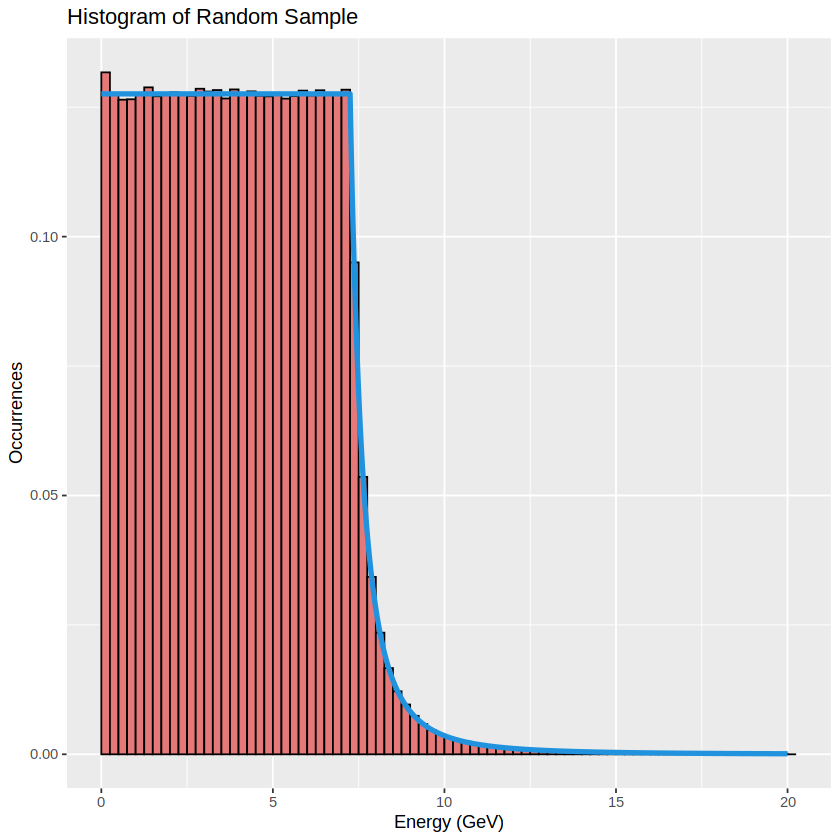

In [91]:
sample <- data.frame(E = sample(energy_values, size = 10^6, replace = TRUE,
                                prob = pdf_values_muons$PDF))
bin_w <- 0.25

ggplot(sample, aes(x = E, y = after_stat(count / (sum(count) * bin_w)))) +
  geom_histogram(breaks = seq(min(energy_values), max(energy_values) + bin_w,
                              by = bin_w), fill = "#e57878", color = "black") +
  geom_line(data = pdf_values_muons,
            aes(x = E, y = PDF), color = "#2193de", size = 1.5) +
  labs(title = "Histogram of Random Sample",
       x = "Energy (GeV)",
       y = "Occurrences")

# Exercise 3

Suppose that the average number of accidents at an intersection is two per day.

### a) Using Markov’s inequality, find a bound for the probability that at least five accidents will occur tomorrow.

In [116]:
markov_bound <- function(k, mu) {
  ifelse(k != 0, mu / k, "Not valid input, k must be non null positive number")
}

avg_acc_per_day <- 2
n_accidents <- 5

sprintf("Upper bound of P (at least 5 accidents tomorrow ): %s",
        markov_bound(n_accidents, avg_acc_per_day))

[1] "Upper bound of P (at least 5 accidents tomorrow ): 0.4"

### b) Using Poisson random variables, calculate the probability that at least five accidents will occur tomorrow. Compare this value with the bound obtained in the previous point a).

In [117]:
poissonian <- function(mu, n) {
  num <- (mu ^ n) * exp(-mu)
  den <- factorial(n)

  return(num / den)
}

probability <- 0

for (i in 0:n_accidents) {
  probability <- probability + poissonian(avg_acc_per_day, i)
}

sprintf("P (at least 5 accidents tomorrow ): %s", 1 - probability)

[1] "P (at least 5 accidents tomorrow ): 0.0165636084806143"

We see that we have two completly different probabilities: from the Poissonian distribution we get $P(\#\: accidents \geq 5) = 0.0166$, while from the Markov's inequality we obtain that the lower bound of the probability is $P(\#\: accidents \geq 5) = 0.4$. This helps us understand that while inequalities are useful to bound our probability, knowing the distribution allows us to make far better predictions.

### c) Let the variance of the number of accidents be two per day. Using Chebyshev’s inequality, find a bound on the probability that tomorrow at least five accidents will occur.

In [119]:
chebyshev_inequality <- function(mu, k, variance) {
  k <- abs(k - mu)
  return((sqrt(variance) / k) ^ 2)
}

variance_n_acc <- 2

sprintf("Upper bound of P (at least 5 accidents tomorrow ): %s",
        chebyshev_inequality(avg_acc_per_day, n_accidents, variance_n_acc))

[1] "Upper bound of P (at least 5 accidents tomorrow ): 0.222222222222222"

# Exercise 4

The waiting period from the time a book is ordered until it is received is a random variable with mean seven days and standard deviation two days. If Helen wants to be 95% sure that she receives a book by certain date, how early should she order the book?

In [121]:
avg <- 7
stddev <- 2
confidence_level <- 0.95

k <- ceiling(sqrt(1 / (1 - confidence_level ^ 2)))

days_in_advance <- avg + k * stddev

days_in_advance

[1] 15

# Exercise 5

An ordinary deck of 52 cards is divided randomly into 26 pairs. Using Chebyshev’s inequality, find an upper bound for the probability that, at most, 10 pairs consist of a black and a red card.

# Exercise 6

In a stationary bus at the departure station, a passenger gets on the bus, on average every 30 seconds.

### a) Compute the probability of getting more than 6 passenger after 2 minutes. Evaluate the probability of having less than 4 passenger after 3 minutes.

### b) Simulate the distribution of the arrival time of the third passenger and superimpose the corresponding pdf.

### c) Repeat the procedure of the point b) for the difference in arrival time between the fifth and the first passenger.